<a href="https://colab.research.google.com/github/visheshagrawal/Course-DeepLearning/blob/main/DL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split

Data

Madaline Algorithm

This is for part (a) 
Current network idea is 8->1

In [ ]:
class MadalineNetwork1():
  
  def __init__(self,input_dim,layer1_dim,output_dim,learning_rate):
    # self.weight1 = np.zeros(shape=(input_dim,layer1_dim))
    self.weight1 = np.random.randn(input_dim,layer1_dim)
    # self.bias1 = np.zeros(shape=(1,layer1_dim))
    self.bias1 = np.random.randn(1,layer1_dim)
    # self.weight_out = np.zeros(shape=(layer1_dim,output_dim))
    self.weight_out = np.random.randn(layer1_dim,output_dim)
    # self.bias_out = np.zeros(shape=(1,output_dim))
    self.bias_out = np.random.randn(1,output_dim)
    self.x_w1=0
    self.x_s1=0
    self.x_w_out=0
    self.x_s_out=0
    self.learning_rate=learning_rate
    self.error_index_array=[]

  def forward(self,input_x):
    #Weight Multiplication from input wTx
    self.x_w1 = np.matmul(input_x,self.weight1)
    #Signum Function
    self.x_s1=np.sign(self.x_w1)
    #Weight Multiplication from input wTx
    self.x_w_out=np.matmul(self.x_s1,self.weight_out)
    #Signum Function
    self.x_s_out=np.sign(self.x_w_out)
    return self.x_s_out

  def backward(self,input_x,value_array):
    #Selects which cases have problem
    for index in range(len(self.error_index_array)):
      #First select the minimum entry in this
      print("Error Index:       ",self.error_index_array[index])
      x_abs = np.absolute(self.x_w1[index])
      print(self.x_w1[index])
      print(x_abs)
      flag=False
      neuron_list=[]
      while flag==False:
        min_neuron = float('inf') 
        min_neuron_index = -1
        if len(neuron_list)!=8:
          for j in range(len(x_abs)):        
            if j not in  neuron_list: 
              if x_abs[j]<min_neuron:
                min_neuron_index= j
                min_neuron= x_abs[j]
          neuron_list.append(min_neuron_index)
        #Neuron is picked, apply fwd prop and check if it's changing the output, if changing make flag=True

        print("Chosen Neuron Index:       ",min_neuron_index)
        print("Chosen Neuron Value :       ",min_neuron)

        #temp_w1 = copy.deepcopy(self.x_w1)
        #print(temp_w1.shape,self.x_w1.shape)
        temp_s1 = copy.deepcopy(self.x_s1)
        temp_s1[index][min_neuron_index]=0-self.x_s1[index][min_neuron_index]
        #temp_value= np.sign(np.matmul(np.sign(temp_w1),self.weight_out))[index]
        temp_value= np.sign(np.matmul(temp_s1,self.weight_out))[index]
        print(temp_value)
        print(value_array[index])
        if  (temp_value == value_array[index]):
          #It is working 
          flag=True 
          neuron_list=[]
        print(flag)
        #Apply Adaline if flag==True
        if (flag==True):
          #We have to apply adaline on this.
          #weight_update
          print(self.weight1.shape)
          #print(input_x.shape)
          print("Initial weights")
          
          print(self.weight1[0][min_neuron_index])
          print(self.weight1[1][min_neuron_index])
          # print(self.bias1[0][min_neuron_index])
          
          print("Weights updated")
          print(self.x_s1[index][min_neuron_index])
          self.weight1[0][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][0]
          self.weight1[1][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][1]
          # self.bias1[0][min_neuron_index] += self.learning_rate*(value_array[index]-temp_value)*1

          print(self.weight1[0][min_neuron_index])
          print(self.weight1[1][min_neuron_index])
          # print(self.bias1[0][min_neuron_index])
        
        if len(neuron_list)==8:
          break


In [ ]:
class TrialMadalineNetwork1():
  
  def __init__(self,input_dim,layer1_dim,output_dim,learning_rate):
    # self.weight1 = np.zeros(shape=(input_dim,layer1_dim))
    self.weight1 = np.random.randn(input_dim,layer1_dim)
    # self.bias1 = np.zeros(shape=(1,layer1_dim))
    self.bias1 = np.random.randn(1,layer1_dim)
    # self.weight_out = np.zeros(shape=(layer1_dim,output_dim))
    self.weight_out = np.random.randn(layer1_dim,output_dim)
    # self.bias_out = np.zeros(shape=(1,output_dim))
    self.bias_out = np.random.randn(1,output_dim)
    self.x_w1=0
    self.x_s1=0
    self.x_w_out=0
    self.x_s_out=0
    self.learning_rate=learning_rate
    self.error_index_array=[]

  def forward(self,input_x):
    #Weight Multiplication from input wTx
    self.x_w1 = np.matmul(input_x,self.weight1)+self.bias1
    #Signum Function
    self.x_s1=self.threshold(self.x_w1)
    #Weight Multiplication from input wTx
    self.x_w_out=np.matmul(self.x_s1,self.weight_out)+self.bias_out
    #Signum Function
    self.x_s_out=self.threshold(self.x_w_out)
    return self.x_s_out

  def threshold(self,value):
    b = np.ones_like(value)
    b[value>=0] = 1
    b[value<0] = -1
    return b

  def backward(self,input_x,value_array):
    #Selects which cases have problem
    for index_el in range(len(self.error_index_array)):
      #First select the minimum entry in this
      index= self.error_index_array[index_el]
      print("Error Index:       ",self.error_index_array[index_el])
      x_abs = np.absolute(self.x_w1[index])
      print(self.x_w1[index])
      print(x_abs)
      flag=False
      neuron_list=[]
      while flag==False:
        if len(neuron_list)==8:
          break
        min_neuron = float('inf') 
        min_neuron_index = -1
        if len(neuron_list)!=8:
          for j in range(len(x_abs)):        
            if j not in  neuron_list: 
              if x_abs[j]<min_neuron:
                min_neuron_index= j
                min_neuron= x_abs[j]
          neuron_list.append(min_neuron_index)
        #Neuron is picked, apply fwd prop and check if it's changing the output, if changing make flag=True

        print("Chosen Neuron Index:       ",min_neuron_index)
        print("Chosen Neuron Value :       ",min_neuron)

        #temp_w1 = copy.deepcopy(self.x_w1)
        #print(temp_w1.shape,self.x_w1.shape)
        temp_s1 = copy.deepcopy(self.x_s1)
        temp_s1[index][min_neuron_index]=-self.x_s1[index][min_neuron_index]
        #temp_value= np.sign(np.matmul(np.sign(temp_w1),self.weight_out))[index]
        temp_value= self.threshold(np.matmul(temp_s1,self.weight_out)+self.bias_out)[index]
        print(temp_value)
        print(value_array[index])
        if  (temp_value == value_array[index]):
          #It is working 
          flag=True 
          neuron_list=[]
        print(flag)
        #Apply Adaline if flag==True
        if (flag==True):
          #We have to apply adaline on this.
          #weight_update
          print(self.weight1.shape)
          #print(input_x.shape)
          print("Initial weights")
          
          print(self.weight1[0][min_neuron_index])
          print(self.weight1[1][min_neuron_index])
          print(self.bias1[0][min_neuron_index])
          
          print("Weights updated")
          print(self.x_s1[index][min_neuron_index])
          self.weight1[0][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][0]
          self.weight1[1][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][1]
          self.bias1[0][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*1

          print(self.weight1[0][min_neuron_index])
          print(self.weight1[1][min_neuron_index])
          print(self.bias1[0][min_neuron_index])

Network for b part
Current Idea is 8->4->1

In [ ]:
class MadalineNetwork2():
  
  def __init__(self,input_dim,layer1_dim,layer2_dim,output_dim,learning_rate):
    # self.weight1 = np.zeros(shape=(input_dim,layer1_dim))
    self.weight1 = np.random.randn(input_dim,layer1_dim)
    self.weight2 = np.random.randn(layer1_dim,layer2_dim)
    # self.bias1 = np.zeros(shape=(1,layer1_dim))
    self.bias1 = np.random.randn(1,layer1_dim)
    self.bias2 = np.random.randn(1,layer2_dim)
    # self.weight_out = np.zeros(shape=(layer1_dim,output_dim))
    self.weight_out = np.random.randn(layer2_dim,output_dim)
    # self.bias_out = np.zeros(shape=(1,output_dim))
    self.bias_out = np.random.randn(1,output_dim)
    self.x_w1=0
    self.x_s1=0
    self.x_w2=0
    self.x_s2=0
    self.x_w_out=0
    self.x_s_out=0
    self.learning_rate=learning_rate
    self.error_index_array=[]

  def forward(self,input_x):
    #Weight Multiplication from input wTx
    self.x_w1 = np.matmul(input_x,self.weight1)+self.bias1
    #Signum Function
    self.x_s1=self.threshold(self.x_w1)
    #Weight Multiplication from input wTx
    self.x_w2=np.matmul(self.x_s1,self.weight2)+self.bias2
    #Signum Function
    self.x_s2=self.threshold(self.x_w2)
    #Weight Multiplication from input wTx
    self.x_w_out=np.matmul(self.x_s2,self.weight_out)+self.bias_out
    #Signum Function
    self.x_s_out=self.threshold(self.x_w_out)
    return self.x_s_out

  def threshold(self,value):
    b = np.ones_like(value)
    b[value>=0] = 1
    b[value<0] = -1
    return b

  def backward(self,input_x,value_array):
    #Selects which cases have problem
    for index_el in range(len(self.error_index_array)):
      #First select the minimum entry in this
      index= self.error_index_array[index_el]
      print("Error Index:       ",self.error_index_array[index_el])
      
      x_abs1 = np.absolute(self.x_w1[index])
      x_abs2 = np.absolute(self.x_w2[index])
      x_abs= np.concatenate((x_abs1,x_abs2))
      
      print(self.x_w1[index])
      print(x_abs)
      flag=False
      neuron_list=[]
      while flag==False:
        min_neuron = float('inf') 
        min_neuron_index = -1
        if len(neuron_list)!=12:
          for j in range(12):        
            if j not in neuron_list: 
              if x_abs[j]<min_neuron:
                min_neuron_index= j
                min_neuron= x_abs[j]
          neuron_list.append(min_neuron_index)
        #Neuron is picked, apply fwd prop and check if it's changing the output, if changing make flag=True

        print("Chosen Neuron Index:       ",min_neuron_index)
        print("Chosen Neuron Value :       ",min_neuron)

        #temp_w1 = copy.deepcopy(self.x_w1)
        #print(temp_w1.shape,self.x_w1.shape)

        if (min_neuron_index<8):

          temp_s1 = copy.deepcopy(self.x_s1)
          temp_s1[index][min_neuron_index]=0-self.x_s1[index][min_neuron_index]
          temp_value= self.threshold(np.matmul(self.threshold(np.matmul(temp_s1,self.weight2)+self.bias2),self.weight_out)+self.bias_out)[index]
          print(temp_value)
          print(value_array[index])
          if  (temp_value == value_array[index]):
            #It is working 
            flag=True 
            neuron_list=[]
          print(flag)
        
        elif min_neuron_index>=8:
          temp_s2 = copy.deepcopy(self.x_s2)
          temp_s2[index][11-min_neuron_index]=0-self.x_s2[index][11-min_neuron_index]
          temp_value= self.threshold(np.matmul(temp_s2,self.weight_out)+self.bias_out)[index]
          print(temp_value)
          print(value_array[index])
          if  (temp_value == value_array[index]):
            #It is working 
            flag=True 
            neuron_list=[]
          print(flag)


        #Apply Adaline if flag==True
        if (flag==True):
          #We have to apply adaline on this.
          #weight_update
          print("Initial weights")
          print("Min neuron is, ",min_neuron_index)

          if (min_neuron_index<8):
            print(self.weight1[0][min_neuron_index])
            print(self.weight1[1][min_neuron_index])
            print("Weights updated")
            print(self.weight1.shape)
            self.weight1[0][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][0]
            self.weight1[1][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*input_x[index][1]
            print(self.weight1[0][min_neuron_index])
            print(self.weight1[1][min_neuron_index])
            self.bias1[0][min_neuron_index] += self.learning_rate*(-2*self.x_s1[index][min_neuron_index])*1

          # self.bias1[0][min_neuron_index] += self.learning_rate*(value_array[index]-temp_value)*1
          elif min_neuron_index>=8:
            
            for weight_update in range(8):
              print(self.weight2[weight_update][11-min_neuron_index])
              #self.weight2[weight_update][11-min_neuron_index] += self.learning_rate*(-2*self.x_s2[index][11-min_neuron_index])*self.x_w1[index][weight_update]
              self.weight2[weight_update][11-min_neuron_index] += self.learning_rate*(-2*self.x_s2[index][11-min_neuron_index])*self.x_s1[index][weight_update]
              print(self.weight2[weight_update][11-min_neuron_index])
            
            self.bias2[0][11-min_neuron_index] += self.learning_rate*(-2*self.x_s2[index][11-min_neuron_index])*1
              
        if len(neuron_list)==12:
          break

In [ ]:
df["Y"].hist()

NameError: ignored

In [ ]:
df = pd.read_excel("dl_1_fin.xlsx")
df = df.sample(frac=1).reset_index(drop=True)
df_2 = pd.read_excel("dl_2_fin.xlsx")
df_2 = df_2.sample(frac=1).reset_index(drop=True)

In [ ]:
subset = df[['X1', 'X2']]
input_data1 = np.array([np.array(x) for x in subset.values])
output_data1= df["Y"].to_numpy()

In [ ]:
subset_2 = df_2[['X1', 'X2']]
input_data2 = np.array([np.array(x) for x in subset_2.values])
output_data2= df_2["Y"].to_numpy()

In [ ]:
layer1_dim=8
layer2_dim=4
input_dim=2
output_dim=1
num_epochs = 20
learning_rate = 0.004


In [ ]:
# mad1= MadalineNetwork1(input_dim,layer1_dim,output_dim,learning_rate)
mad1= TrialMadalineNetwork1(input_dim,layer1_dim,output_dim,learning_rate)

In [ ]:
for epoch in range(num_epochs):
  result_out=mad1.forward(input_data1)
  print(result_out)
  mad1.error_index_array=[]
  for o in range(len(output_data1)):
    if result_out[o]!=output_data1[o]:
      print(o)
      mad1.error_index_array.append(o)
  mad1.backward(input_data1,output_data1)

Streaming output truncated to the last 5000 lines.
-0.24173619671232813
Error Index:        77
[ 0.35510597  0.21099502  1.23207389 -1.92385924 -1.30340616 -0.14171907
 -2.49802721 -7.21955017]
[0.35510597 0.21099502 1.23207389 1.92385924 1.30340616 0.14171907
 2.49802721 7.21955017]
Chosen Neuron Index:        5
Chosen Neuron Value :        0.14171907218641594
[-1.]
1
False
Chosen Neuron Index:        1
Chosen Neuron Value :        0.21099501800979192
[-1.]
1
False
Chosen Neuron Index:        0
Chosen Neuron Value :        0.355105973257795
[1.]
1
True
(2, 8)
Initial weights
-0.5849730393281298
-0.12274623734849592
-0.24173619671232813
Weights updated
1.0
-0.6089730393281299
-0.14674623734849593
-0.24973619671232813
Error Index:        79
[-1.01693604 -1.94966669 -0.27637424 -2.39974507  1.48320938  1.21780608
  1.53973806 -0.92239127]
[1.01693604 1.94966669 0.27637424 2.39974507 1.48320938 1.21780608
 1.53973806 0.92239127]
Chosen Neuron Index:        2
Chosen Neuron Value :        0

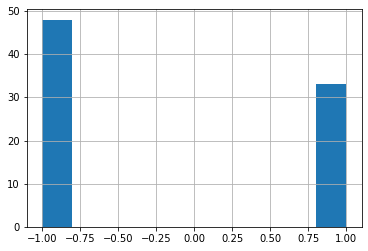

In [ ]:
df["Y"].hist()

In [ ]:
from sklearn.metrics import accuracy_score
print(mad1.forward(input_data1))
accuracy_score(mad1.forward(input_data1).reshape(input_data1.shape[0]),output_data1)

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


0.5432098765432098

In [ ]:
mad2= MadalineNetwork2(input_dim,layer1_dim,layer2_dim,output_dim,learning_rate)

In [ ]:
for epoch in range(num_epochs):
  result_out=mad2.forward(input_data2)
  print(result_out)
  mad2.error_index_array=[]
  for o in range(len(output_data2)):
    if result_out[o]!=output_data2[o]:
      print(o)
      mad2.error_index_array.append(o)
  mad2.backward(input_data2,output_data2)

Streaming output truncated to the last 5000 lines.
 12.51481128  2.46179537  4.62679125  1.06332433  0.75414964  4.48678535]
Chosen Neuron Index:        3
Chosen Neuron Value :        0.14565229973441718
[1.]
1
True
Initial weights
Min neuron is,  3
0.20742888138831747
-0.41386290346357674
Weights updated
(2, 8)
0.23142888138831746
-0.38186290346357676
Error Index:        50
[-11.41390054   3.09500488   3.07805852  -1.30880699  -9.37854388
   7.5421531  -17.98974085  -3.3324338 ]
[11.41390054  3.09500488  3.07805852  1.30880699  9.37854388  7.5421531
 17.98974085  3.3324338   4.62679125  1.06332433  0.75414964  4.48678535]
Chosen Neuron Index:        10
Chosen Neuron Value :        0.7541496382550122
[1.]
1
True
Initial weights
Min neuron is,  10
0.2882864221914131
0.2802864221914131
0.8018673416512425
0.8098673416512425
-0.5655688046780774
-0.5575688046780773
0.6048475229316864
0.5968475229316864
-0.6403228926513027
-0.6483228926513027
0.2582694395161703
0.2662694395161703
0.185868084

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(mad2.forward(input_data2))
print(output_data2)
print(accuracy_score(mad2.forward(input_data2).reshape(input_data2.shape[0]),output_data2))
print(confusion_matrix(mad2.forward(input_data2).reshape(input_data2.shape[0]),output_data2))

In [ ]:
layer1_dim=8
layer2_dim=4
input_dim=2
output_dim=1
num_epochs = 20
learning_rate = 0.0033

In [ ]:
mad3= MadalineNetwork2(input_dim,layer1_dim,layer2_dim,output_dim,learning_rate)
for epoch in range(num_epochs):
  result_out=mad3.forward(input_data2)
  print(result_out)
  mad3.error_index_array=[]
  for o in range(len(output_data2)):
    if result_out[o]!=output_data2[o]:
      print(o)
      mad3.error_index_array.append(o)
  mad3.backward(input_data2,output_data2)

from sklearn.metrics import accuracy_score,confusion_matrix
print(mad3.forward(input_data2))
print(output_data2)
print(accuracy_score(mad3.forward(input_data2).reshape(input_data2.shape[0]),output_data2))
print(confusion_matrix(mad3.forward(input_data2).reshape(input_data2.shape[0]),output_data2))


Streaming output truncated to the last 5000 lines.
Chosen Neuron Index:        8
Chosen Neuron Value :        1.2189496461686335
[-1.]
1
False
Chosen Neuron Index:        4
Chosen Neuron Value :        1.9300652027735246
[-1.]
1
False
Chosen Neuron Index:        2
Chosen Neuron Value :        2.063036170424078
[1.]
1
True
Initial weights
Min neuron is,  2
-0.8128765798826405
0.17520724834907742
Weights updated
(2, 8)
-0.7808765798826405
0.1992072483490774
Error Index:        58
[-10.2492424    9.47925949  -3.19512     12.76466971   1.70625689
  -7.01219689  -1.79795074 -12.84082709]
[10.2492424   9.47925949  3.19512    12.76466971  1.70625689  7.01219689
  1.79795074 12.84082709  1.21894965  4.84087266  0.80276725  4.01003127]
Chosen Neuron Index:        10
Chosen Neuron Value :        0.8027672458967808
[-1.]
1
False
Chosen Neuron Index:        8
Chosen Neuron Value :        1.2189496461686335
[-1.]
1
False
Chosen Neuron Index:        4
Chosen Neuron Value :        1.7062568873141117


In [ ]:
# save the model to disk
import pickle
filename = 'model1.sav'
#pickle.dump(mad1, open(filename, 'wb'))

filename2 = 'model2.sav'
#pickle.dump(mad3, open(filename2, 'wb'))

In [ ]:
loaded_model_1 = pickle.load(open(filename, 'rb'))
# accuracy_score(input_data1, Y_test)
# print(mad1.forward(input_data1))
accuracy_score(loaded_model_1.forward(input_data1).reshape(input_data1.shape[0]),output_data1)
# print(result)

0.6419753086419753

In [ ]:
test_input_data=np.array([[3,3]])
loaded_model_1.forward(test_input_data).reshape(test_input_data.shape[0])

array([1.])

In [ ]:
test_input_data=np.array([[3,3]])
loaded_model_2.forward(test_input_data).reshape(test_input_data.shape[0])

array([-1.])

In [ ]:
loaded_model_2 = pickle.load(open(filename2, 'rb'))
# accuracy_score(input_data1, Y_test)
# print(mad1.forward(input_data1))
accuracy_score(loaded_model_2.forward(input_data2).reshape(input_data2.shape[0]),output_data2)

0.5679012345679012